# # The E-commerce company shipment Data

# Task

An international e-commerce company based wants to discover key insights from their customer database. 

They want to use some of the most advanced machine learning techniques to study their customers. 

The company sells electronic products.

The data has 12 columns and 10999 rows, in this data the columns are ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms and Reached_on_Time.


There are 4 object values and 8 integer values columns. So start with import the dataset in python and do the cleaning.


In [67]:
import pandas as pd
import numpy as np

In [68]:
ecom = pd.read_csv(r'D:\BIA-main (1)\BIA-main\BIA_Project\Thane branch 2 Capstone project\Thane branch 2 Capstone project\ECom\Ecom 2 - Amey Kadam\archive\Train.csv')

In [69]:
ecom.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [70]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [71]:
ecom.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [72]:
ecom.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [73]:
ecom.duplicated().sum()

0

I dont need the "ID" column so I removed it, "Reached.on.Time_Y.N" Rename column name, and "Product_importance" change 'objet' to integer same as "Reached_on_Time".

In [74]:
ecom.drop('ID', axis=1, inplace=True)
ecom.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1, inplace=True)
ecom['Reached_on_Time'].replace({1:'No', 0:'Yes'}, inplace=True)
ecom['Product_importance'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)

In [75]:
ecom.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,2,177,3,0,F,44,1233,No
1,F,Flight,4,5,216,2,0,M,59,3088,No
2,A,Flight,2,2,183,4,0,M,48,3374,No
3,B,Flight,3,3,176,4,1,M,10,1177,No
4,C,Flight,2,2,184,3,1,F,46,2484,No


In [76]:
print("# of Unique Values: \n")
print(ecom.nunique())

# of Unique Values: 

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached_on_Time           2
dtype: int64


Here i used to find the unique values in ecom dataset which are less the 10.

In [77]:
print("Unique Values:\n")
for i in range(len(ecom.nunique())):
    if ecom.nunique()[i] < 10:
        print("* ", ecom.nunique().index[i], ": ", sorted(ecom.iloc[:, i].unique()), sep='')

Unique Values:

* Warehouse_block: ['A', 'B', 'C', 'D', 'F']
* Mode_of_Shipment: ['Flight', 'Road', 'Ship']
* Customer_care_calls: [2, 3, 4, 5, 6, 7]
* Customer_rating: [1, 2, 3, 4, 5]
* Prior_purchases: [2, 3, 4, 5, 6, 7, 8, 10]
* Product_importance: [0, 1, 2]
* Gender: ['F', 'M']
* Reached_on_Time: ['No', 'Yes']


In [78]:
print("Columns:")
for column in ecom.columns:
    print("* {}".format(column))

Columns:
* Warehouse_block
* Mode_of_Shipment
* Customer_care_calls
* Customer_rating
* Cost_of_the_Product
* Prior_purchases
* Product_importance
* Gender
* Discount_offered
* Weight_in_gms
* Reached_on_Time


In [79]:
# Calculate the average rating
rating_counts = ecom['Customer_rating'].value_counts()

print(rating_counts)

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64


# Exploratory Data Analysis (EDA)

To do EDA first we have to import Matplotlip, seaborn and scipy.

In [80]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [81]:
# TO find the co-relation and 
print("Unique Values:\n")
for i in range(len(ecom.nunique())):
    if ecom.nunique()[i] < 10:
        print("* ", ecom.nunique().index[i], ": ", sorted(ecom.iloc[:, i].unique()), sep='')

Unique Values:

* Warehouse_block: ['A', 'B', 'C', 'D', 'F']
* Mode_of_Shipment: ['Flight', 'Road', 'Ship']
* Customer_care_calls: [2, 3, 4, 5, 6, 7]
* Customer_rating: [1, 2, 3, 4, 5]
* Prior_purchases: [2, 3, 4, 5, 6, 7, 8, 10]
* Product_importance: [0, 1, 2]
* Gender: ['F', 'M']
* Reached_on_Time: ['No', 'Yes']


In [82]:
# View summary statistics of numerical variables
print(ecom.describe())

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Product_importance  Discount_offered  Weight_in_gms  
count     10999.000000        10999.000000      10999.000000   10999.000000  
mean          3.567597            0.604600         13.373216    3634.016729  
std           1.522860            0.641464         16.205527    1635.377251  
min           2.000000            0.000000          1.000000    1001.000000

In [83]:
# View correlation matrix
print(ecom.corr())

                     Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.012209   
Customer_rating                 0.012209         1.000000   
Cost_of_the_Product             0.323182         0.009270   
Prior_purchases                 0.180771         0.013179   
Product_importance             -0.058134         0.003999   
Discount_offered               -0.130750        -0.003124   
Weight_in_gms                  -0.276615        -0.001897   

                     Cost_of_the_Product  Prior_purchases  Product_importance  \
Customer_care_calls             0.323182         0.180771           -0.058134   
Customer_rating                 0.009270         0.013179            0.003999   
Cost_of_the_Product             1.000000         0.123676           -0.046789   
Prior_purchases                 0.123676         1.000000            0.027317   
Product_importance             -0.046789         0.027317            1.000000   
Discount_offered         

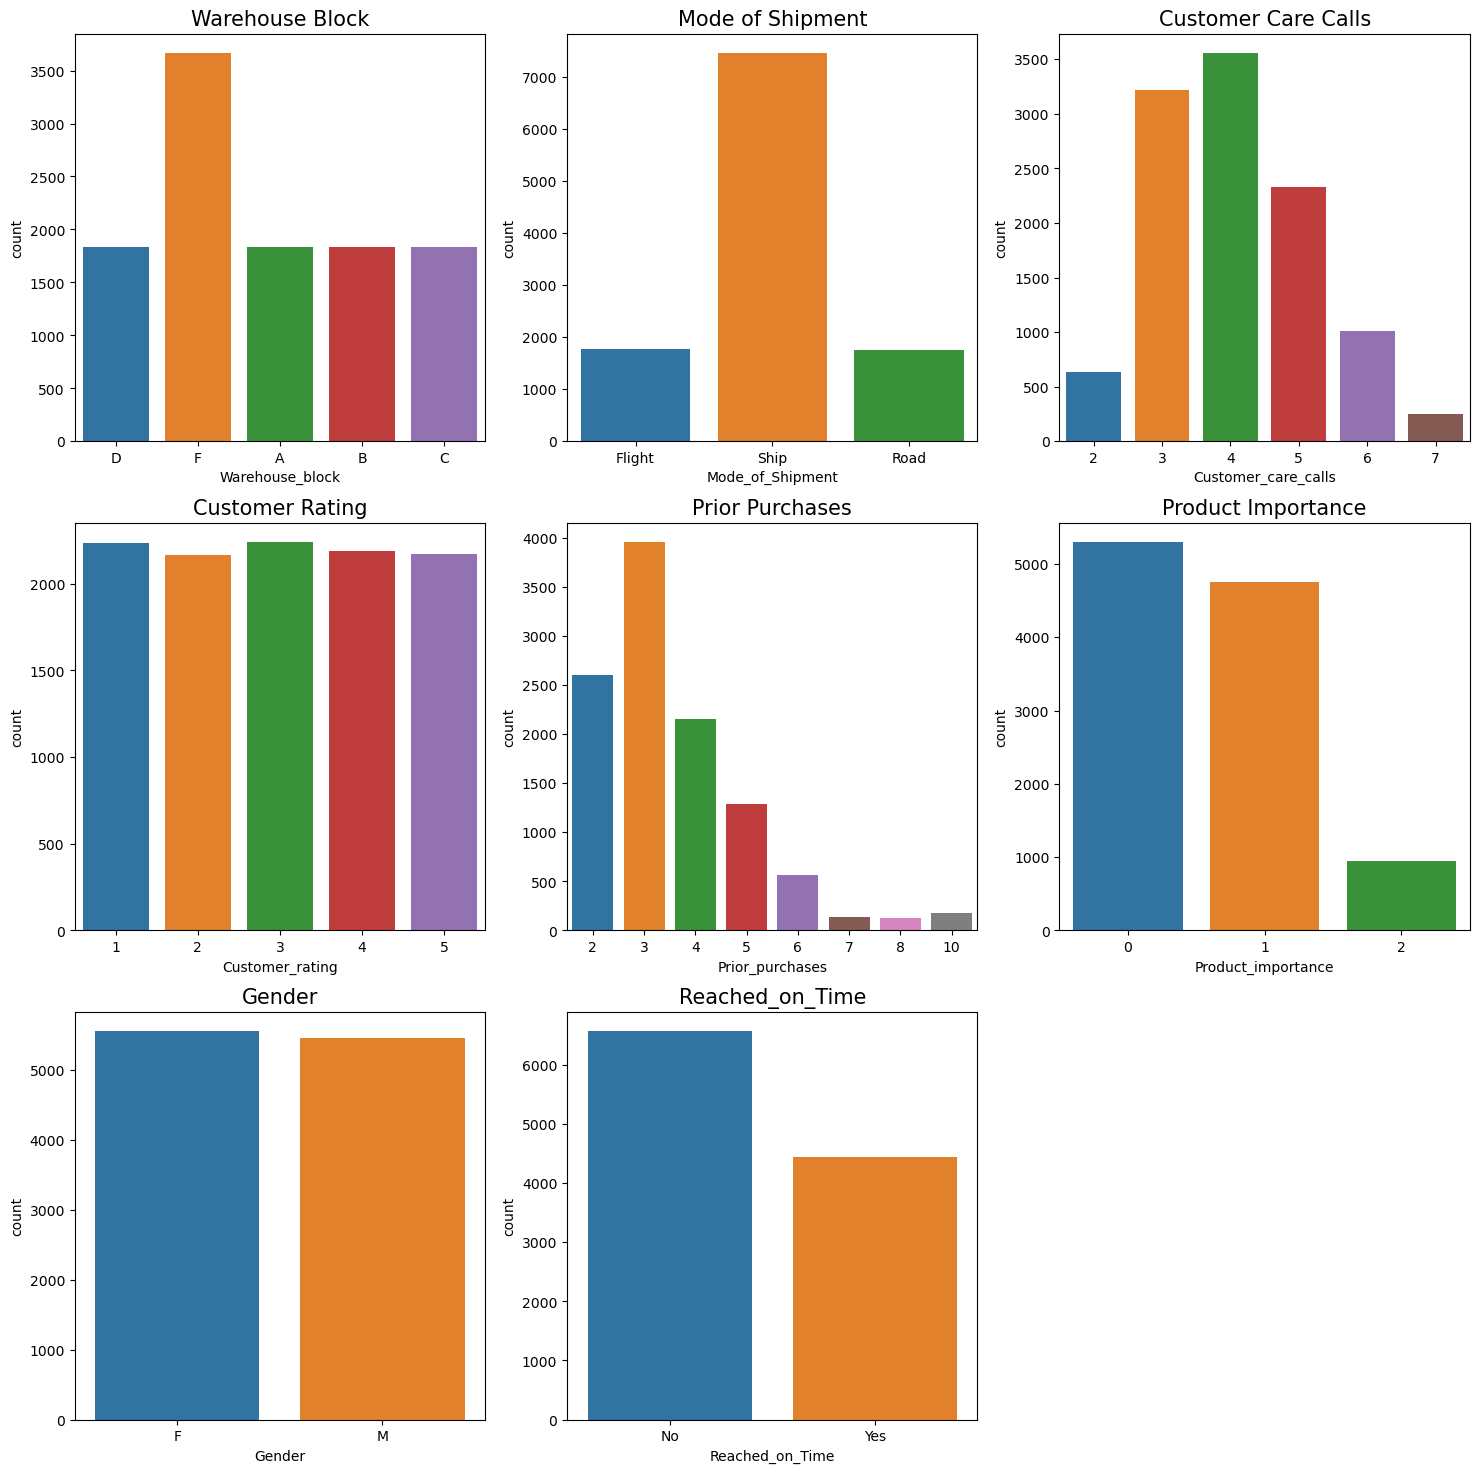

In [84]:
# Visualize distribution of target variable
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', data=ecom)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', data=ecom)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', data=ecom)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', data=ecom)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', data=ecom)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', data=ecom)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', data=ecom)
plt.title('Gender', fontsize=15)

plt.subplot(3, 3, 8)
sns.countplot(x='Reached_on_Time', data=ecom)
plt.title('Reached_on_Time', fontsize=15)

plt.show()

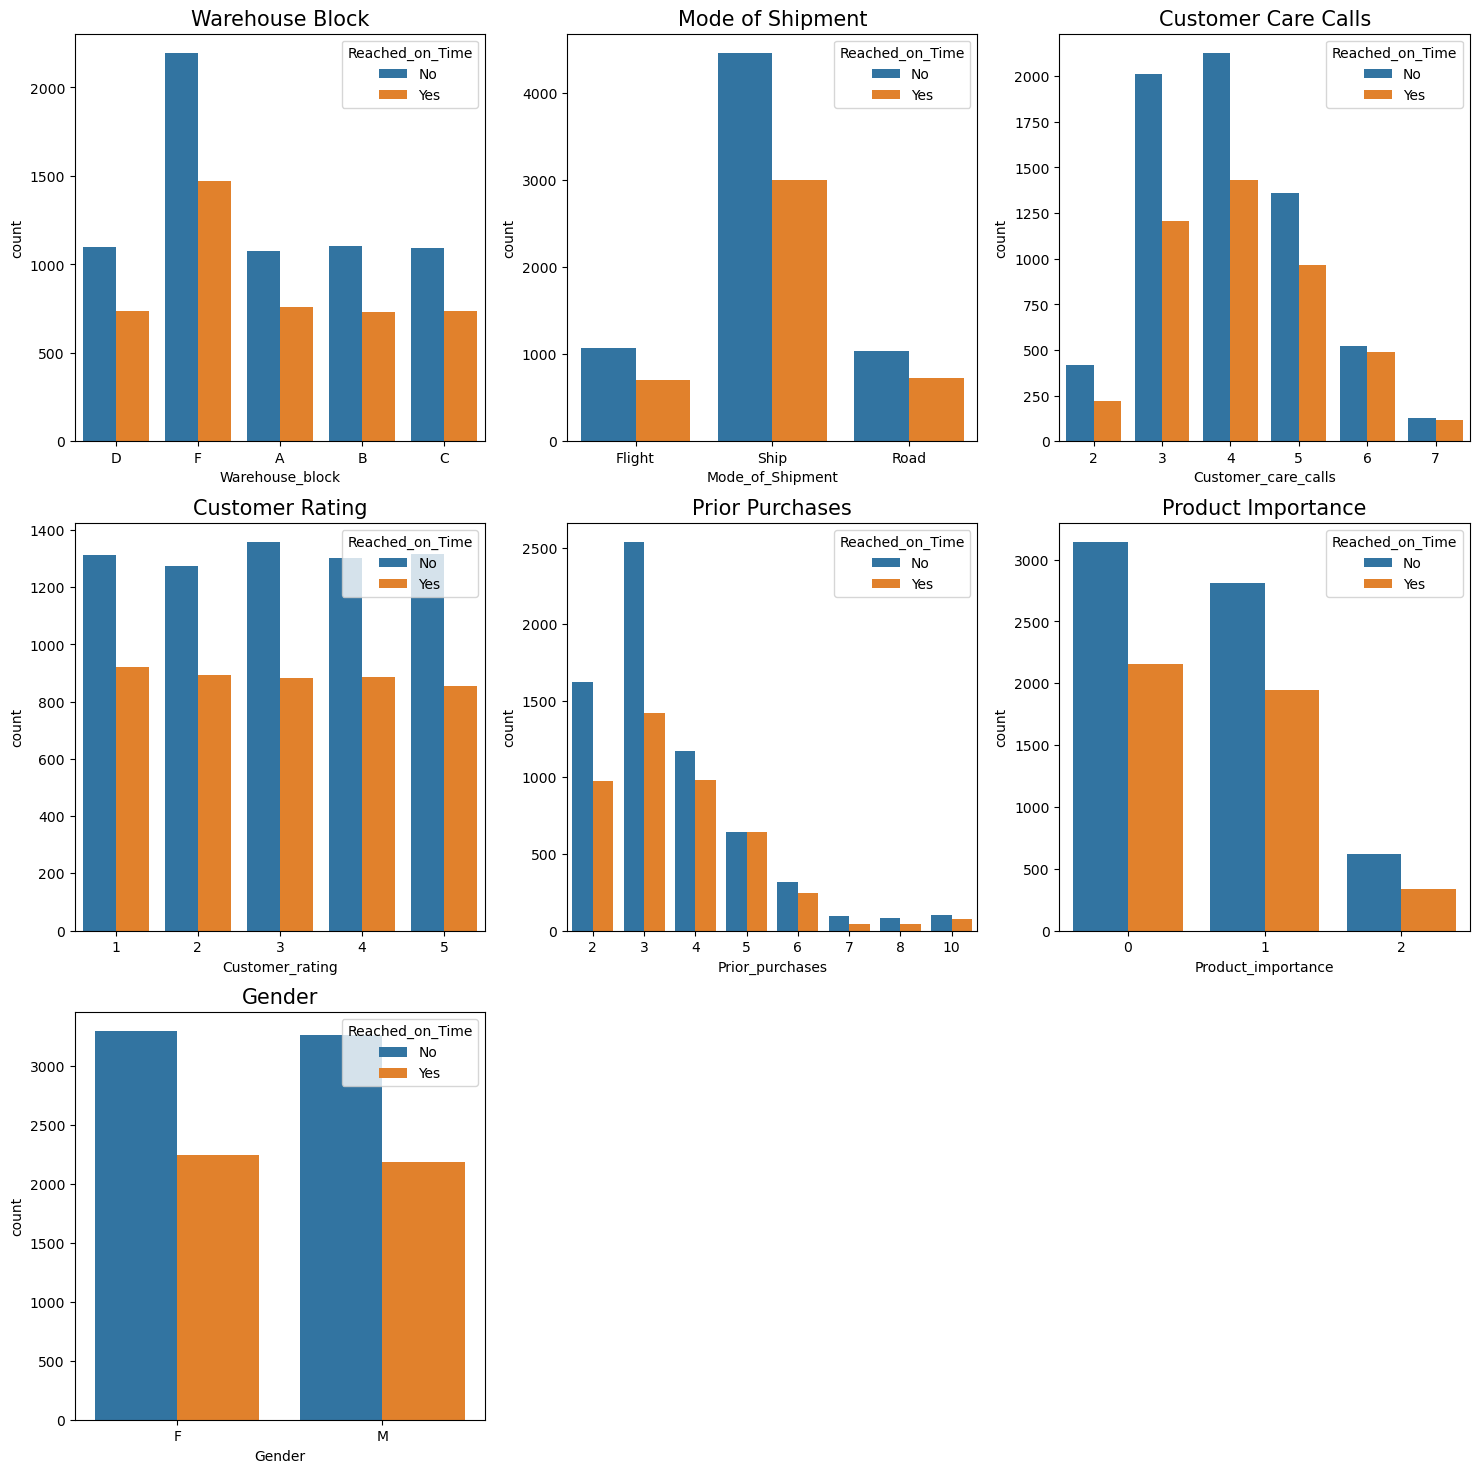

In [85]:
# Visualize relationship between two variables

plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='Reached_on_Time', data=ecom)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='Reached_on_Time', data=ecom)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', hue='Reached_on_Time',  data=ecom)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', hue='Reached_on_Time',  data=ecom)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', hue='Reached_on_Time',  data=ecom)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', hue='Reached_on_Time',  data=ecom)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Reached_on_Time',  data=ecom)
plt.title('Gender', fontsize=15)

plt.show()

# Numeric Features


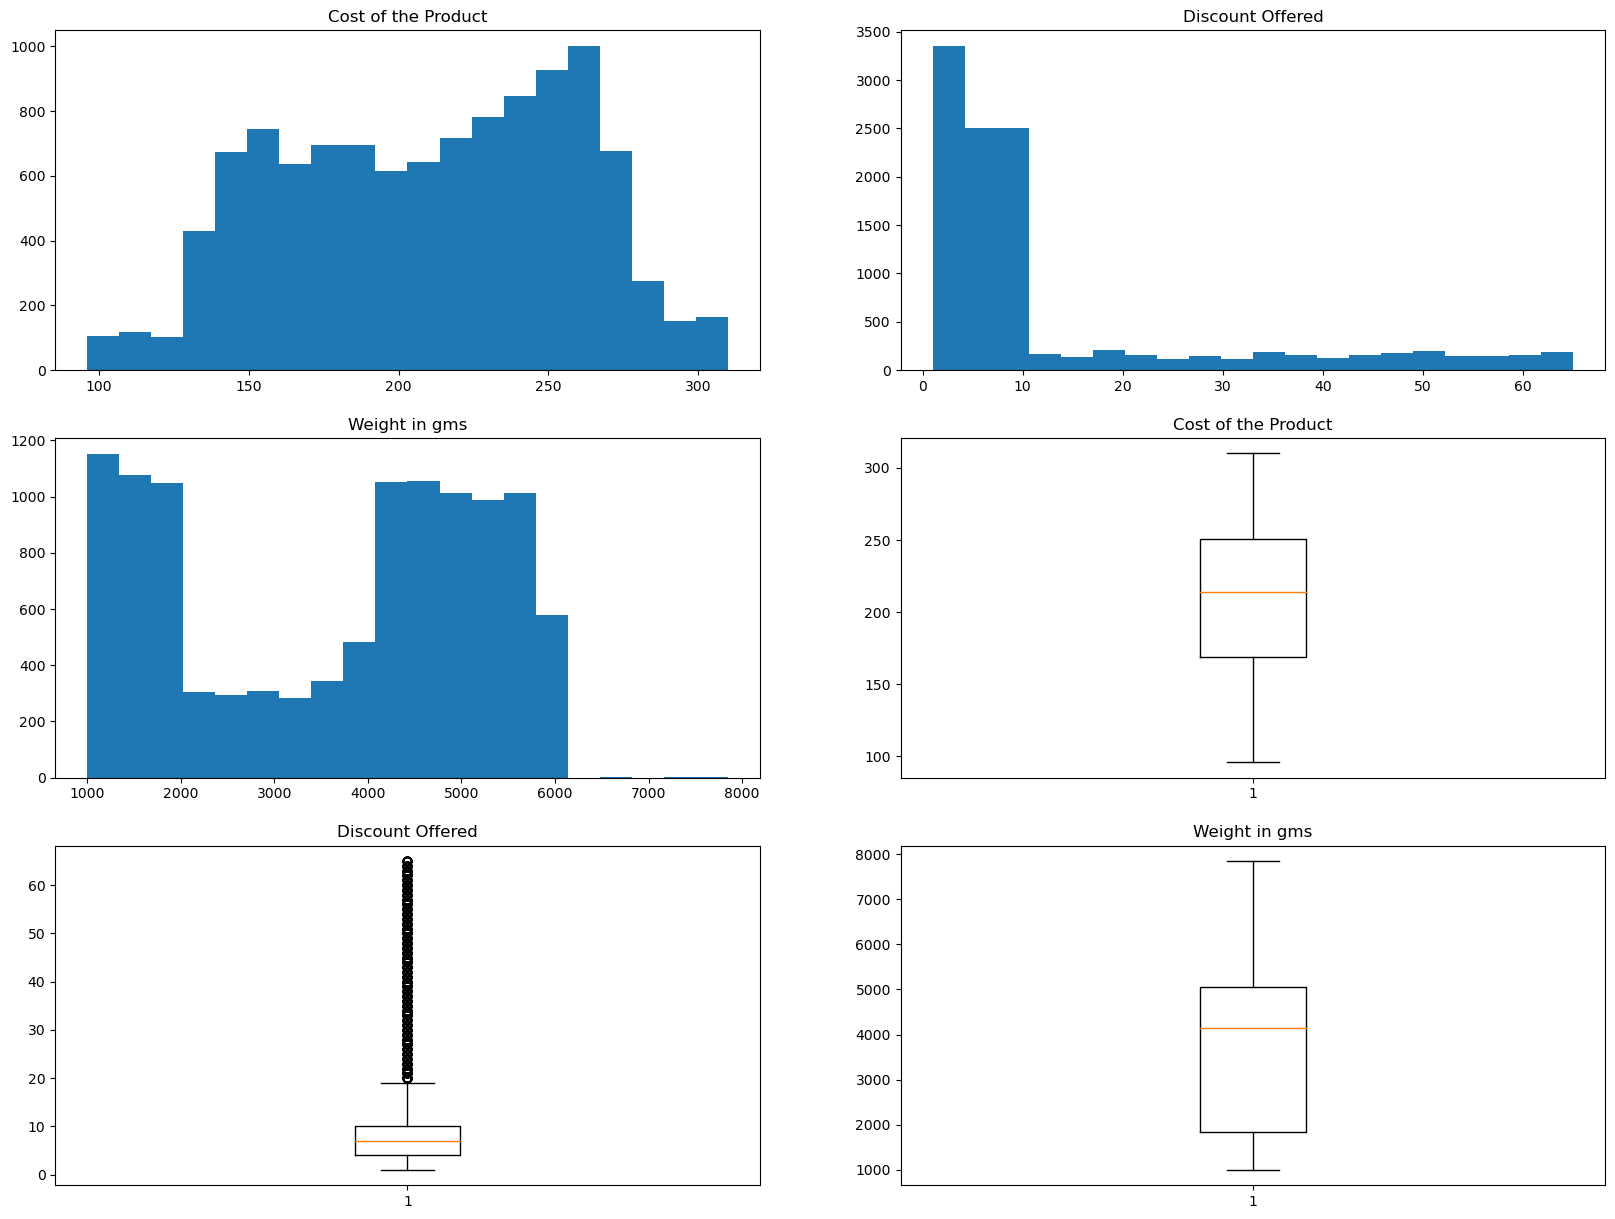

In [86]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
plt.hist(ecom['Cost_of_the_Product'], bins=20)
plt.title('Cost of the Product')

plt.subplot(3, 2, 2)
plt.hist(ecom['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(3, 2, 3)
plt.hist(ecom['Weight_in_gms'], bins=20)
plt.title('Weight in gms')

plt.subplot(3, 2, 4)
plt.boxplot(ecom['Cost_of_the_Product'])
plt.title('Cost of the Product')

plt.subplot(3, 2, 5)
plt.boxplot(ecom['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(3, 2, 6)
plt.boxplot(ecom['Weight_in_gms'])
plt.title('Weight in gms')

plt.show()

Ploting scatter chart using cost_of_the_Product and reached_on_time.

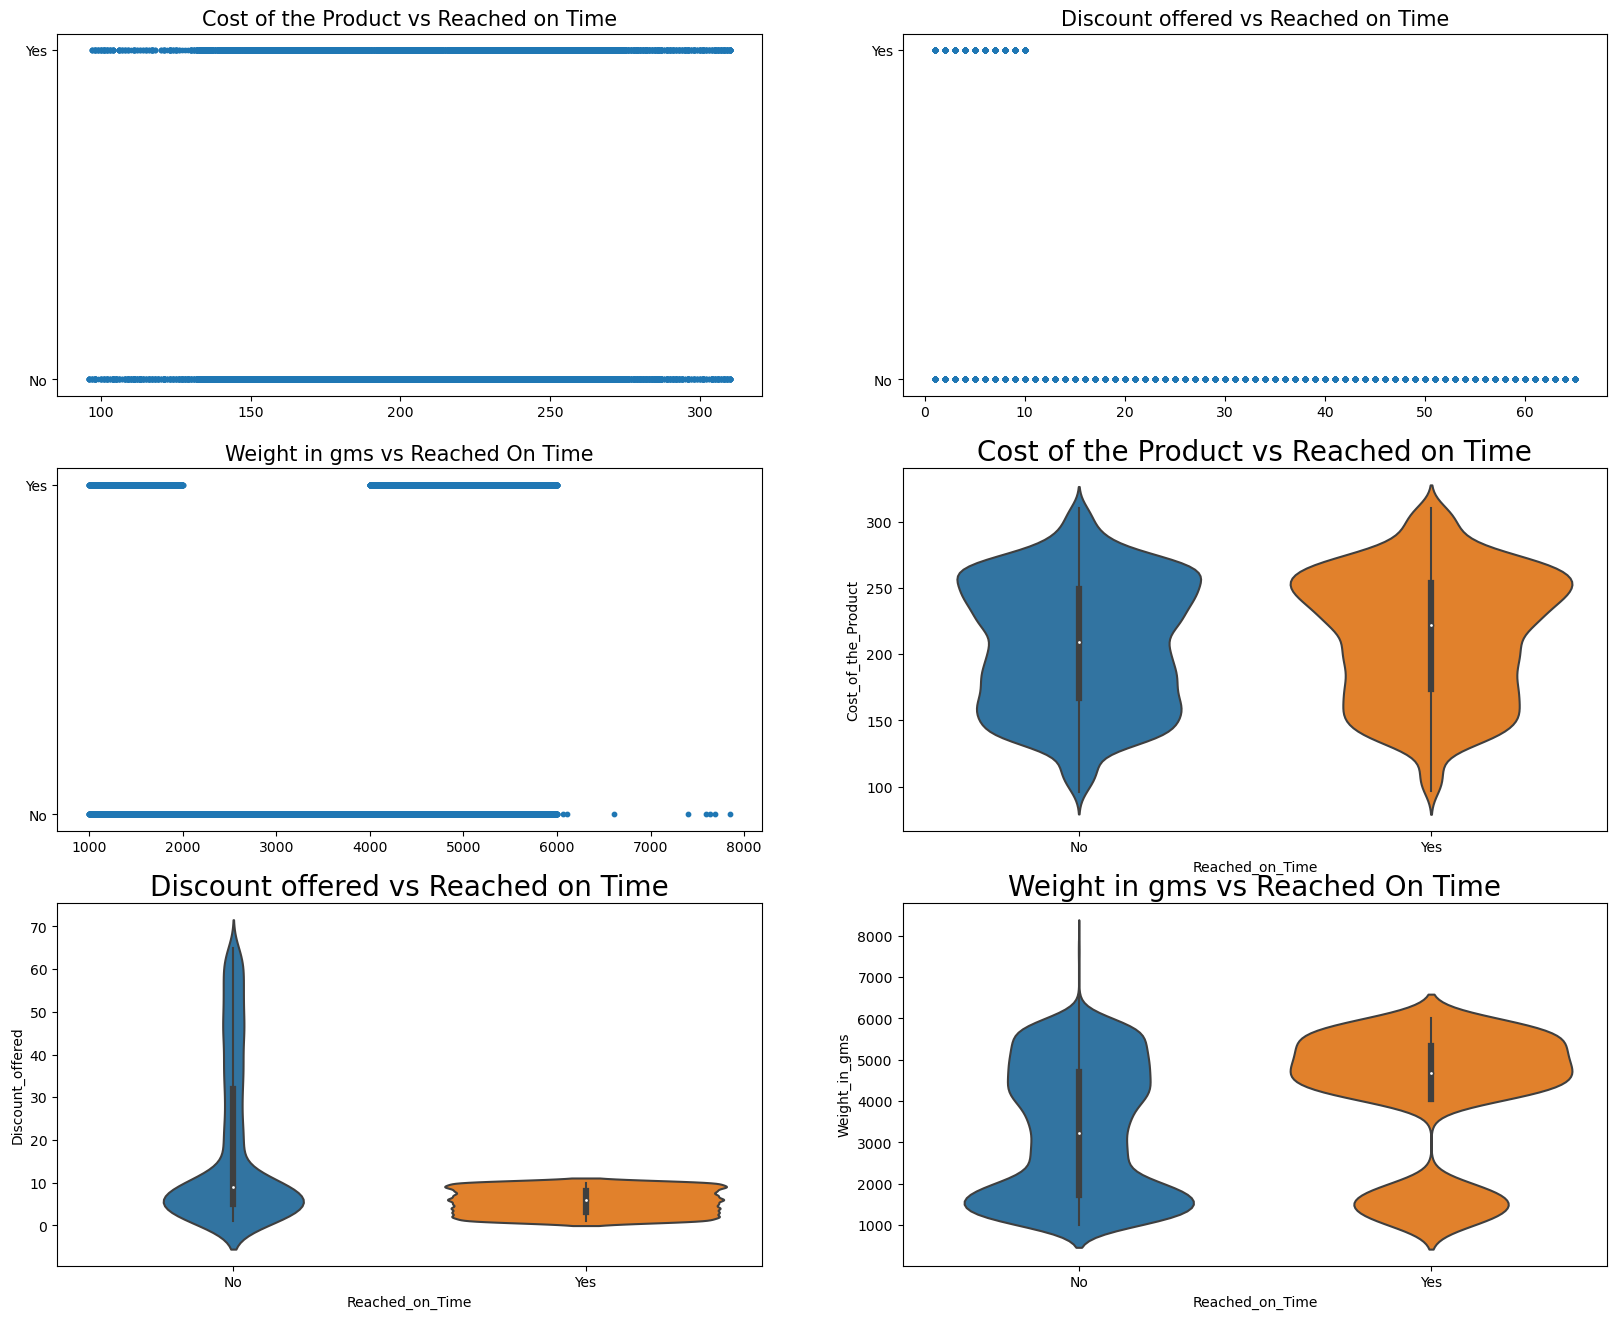

In [87]:
plt.figure(figsize=(20, 16))

plt.subplot(3, 2, 1)
plt.scatter(ecom['Cost_of_the_Product'], ecom['Reached_on_Time'], s=10)
plt.title("Cost of the Product vs Reached on Time", fontsize=15)

plt.subplot(3, 2, 2)
plt.scatter(ecom['Discount_offered'], ecom['Reached_on_Time'], s=10)
plt.title("Discount offered vs Reached on Time", fontsize=15)

plt.subplot(3, 2, 3)
plt.scatter(ecom['Weight_in_gms'], ecom['Reached_on_Time'], s=10)
plt.title("Weight in gms vs Reached On Time", fontsize=15)

plt.subplot(3, 2, 4)
sns.violinplot(x='Reached_on_Time', y='Cost_of_the_Product', data=ecom)
plt.title("Cost of the Product vs Reached on Time", fontsize=20)

plt.subplot(3, 2, 5)
sns.violinplot(x='Reached_on_Time', y='Discount_offered', data=ecom)
plt.title("Discount offered vs Reached on Time", fontsize=20)

plt.subplot(3, 2, 6)
sns.violinplot(x='Reached_on_Time', y='Weight_in_gms', data=ecom)
plt.title("Weight in gms vs Reached On Time", fontsize=20)

plt.show()

# Target Column

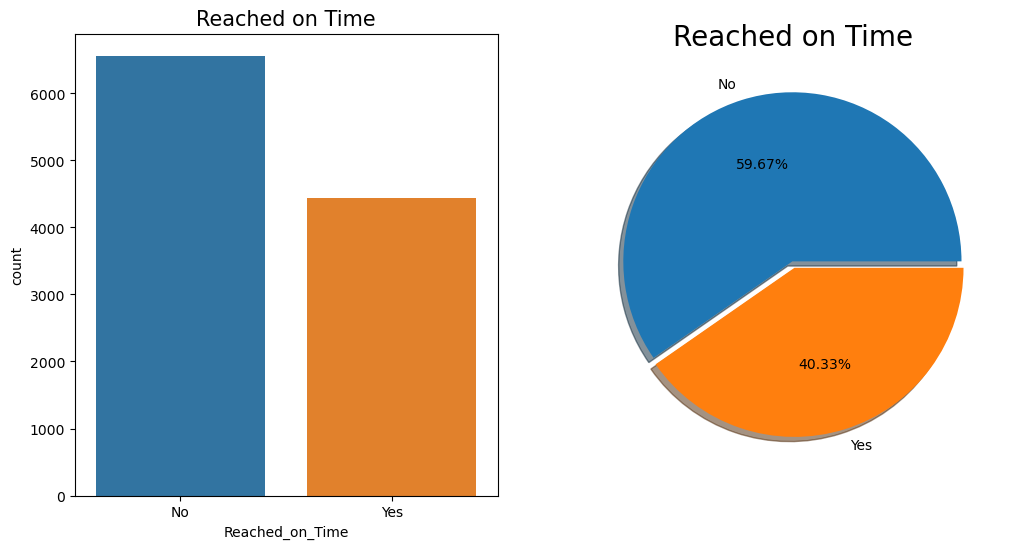

In [88]:
# To see the output on Reached_on_time colom used Bar and pie chart.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Reached_on_Time', data=ecom)
plt.title('Reached on Time', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(ecom['Reached_on_Time'].value_counts(), labels=['No', 'Yes'], explode=[0.02, 0.02], autopct='%1.2f%%', shadow=True)
plt.title('Reached on Time', fontsize=20)

plt.show()

# Outliers

According to the boxplots created earlier, the only column with outliers seems to be on "Discount_offered" column. 
But there seems to be a lot of outliers in this feature, because of the way boxplot defines outliers. 
Therefore, instead of directly removing or winsorizing those outliers, I will first apply Log transformation and Square root 
transformation to see which works better. Then, I will winsorize the remaining outliers.

In [89]:
# apply log transformation to the column containing outliers
log_data = np.log(ecom['Discount_offered'])

In [90]:
# apply square root transformation on column 'B'
Sr_data = np.sqrt(ecom['Discount_offered'])

In [91]:
# apply log transformation to the column containing outliers
log_data = np.log(ecom['Discount_offered'])

# winsorize the y column to remove outliers
ecom['Discount_offered'] = winsorize(ecom['Discount_offered'], limits=[0.1, 0.1])

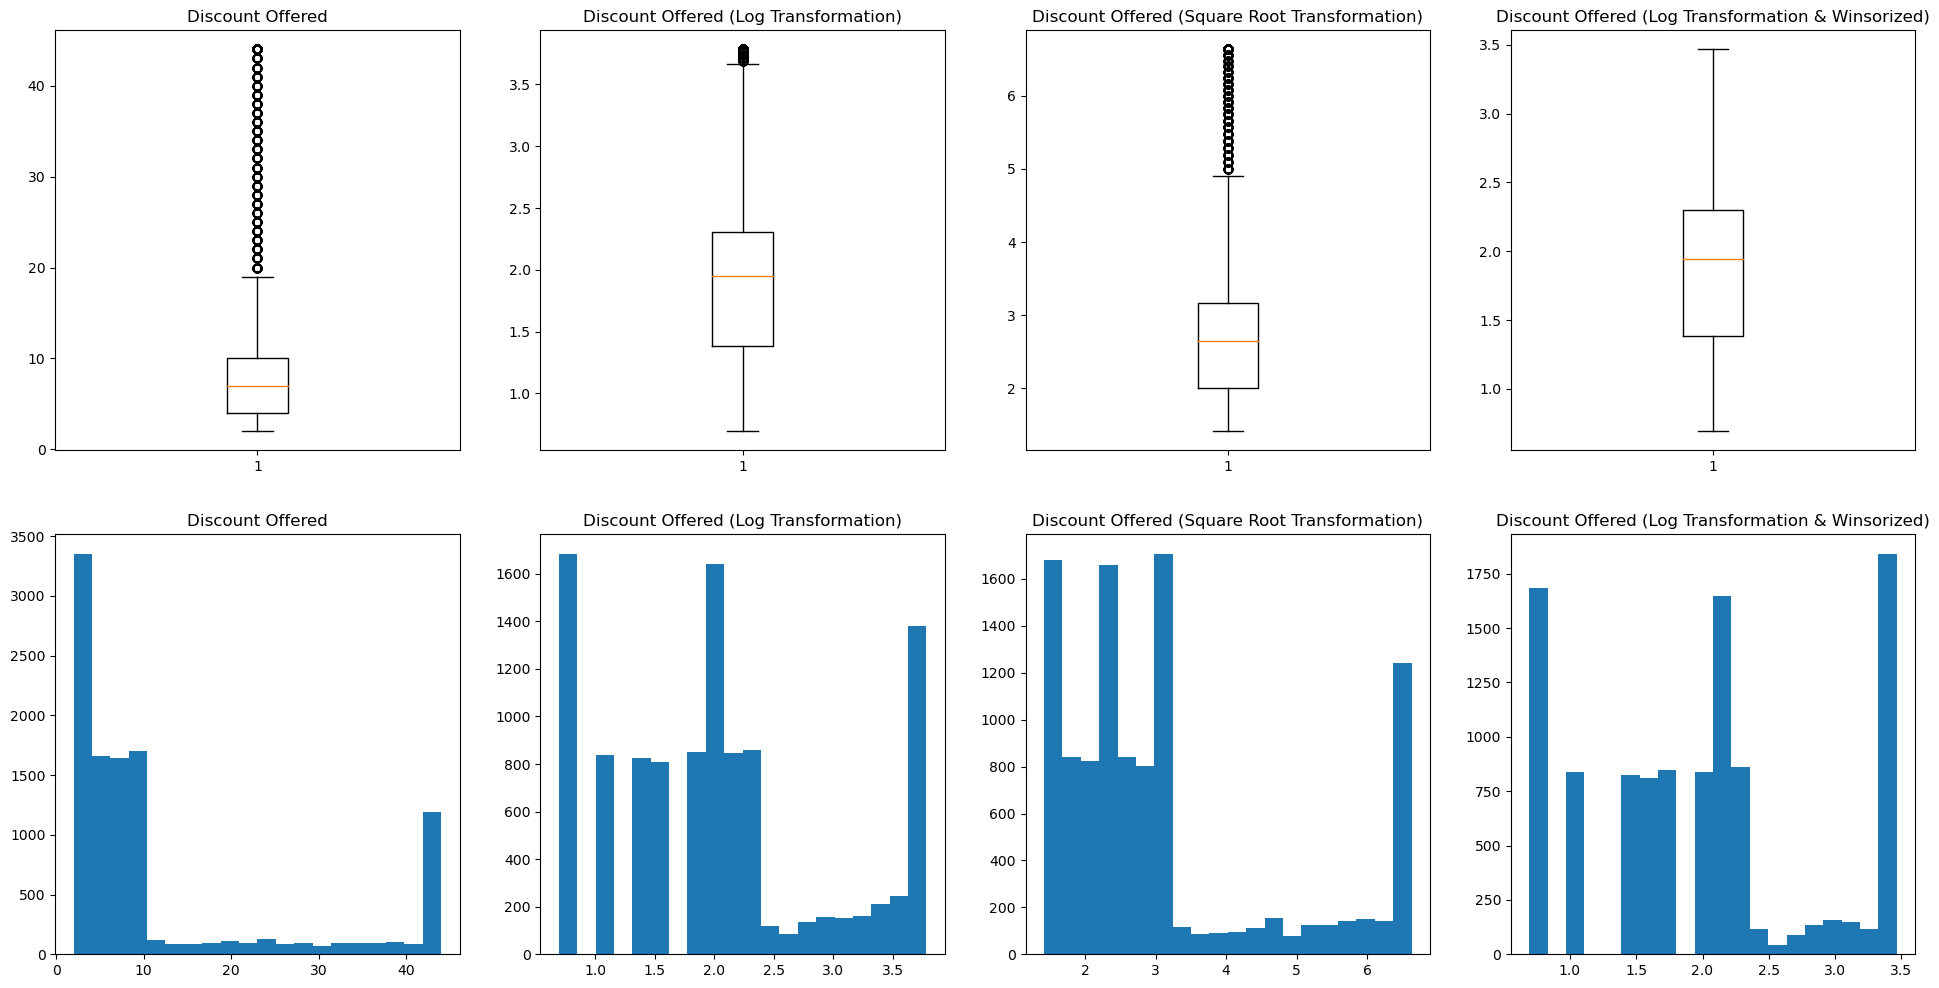

In [92]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 4, 1)
plt.boxplot(ecom['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(2, 4, 2)
plt.boxplot(np.log(ecom['Discount_offered']))
plt.title('Discount Offered (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(np.sqrt(ecom['Discount_offered']))
plt.title('Discount Offered (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(winsorize(np.log(ecom['Discount_offered']),limits=(0.15, 0.15)));
plt.title('Discount Offered (Log Transformation & Winsorized)')

plt.subplot(2, 4, 5)
plt.hist(ecom['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(2, 4, 6)
plt.hist(np.log(ecom['Discount_offered']), bins=20)
plt.title('Discount Offered (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(np.sqrt(ecom['Discount_offered']), bins=20)
plt.title('Discount Offered (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(winsorize(np.log(ecom['Discount_offered']),limits=(0.15, 0.15)), bins=20);
plt.title('Discount Offered (Log Transformation & Winsorized)')


plt.show()

In [93]:
ecom['Discount_offered'] = np.array(winsorize(np.log(ecom['Discount_offered']),limits=(0.15, 0.15)))
ecom

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,2,177,3,0,F,3.465736,1233,No
1,F,Flight,4,5,216,2,0,M,3.465736,3088,No
2,A,Flight,2,2,183,4,0,M,3.465736,3374,No
3,B,Flight,3,3,176,4,1,M,2.302585,1177,No
4,C,Flight,2,2,184,3,1,F,3.465736,2484,No
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,1,F,0.693147,1538,No
10995,B,Ship,4,1,232,5,1,F,1.791759,1247,Yes
10996,C,Ship,5,4,242,5,0,F,1.386294,1155,Yes
10997,F,Ship,5,2,223,6,1,M,0.693147,1210,Yes


# HEATMAP

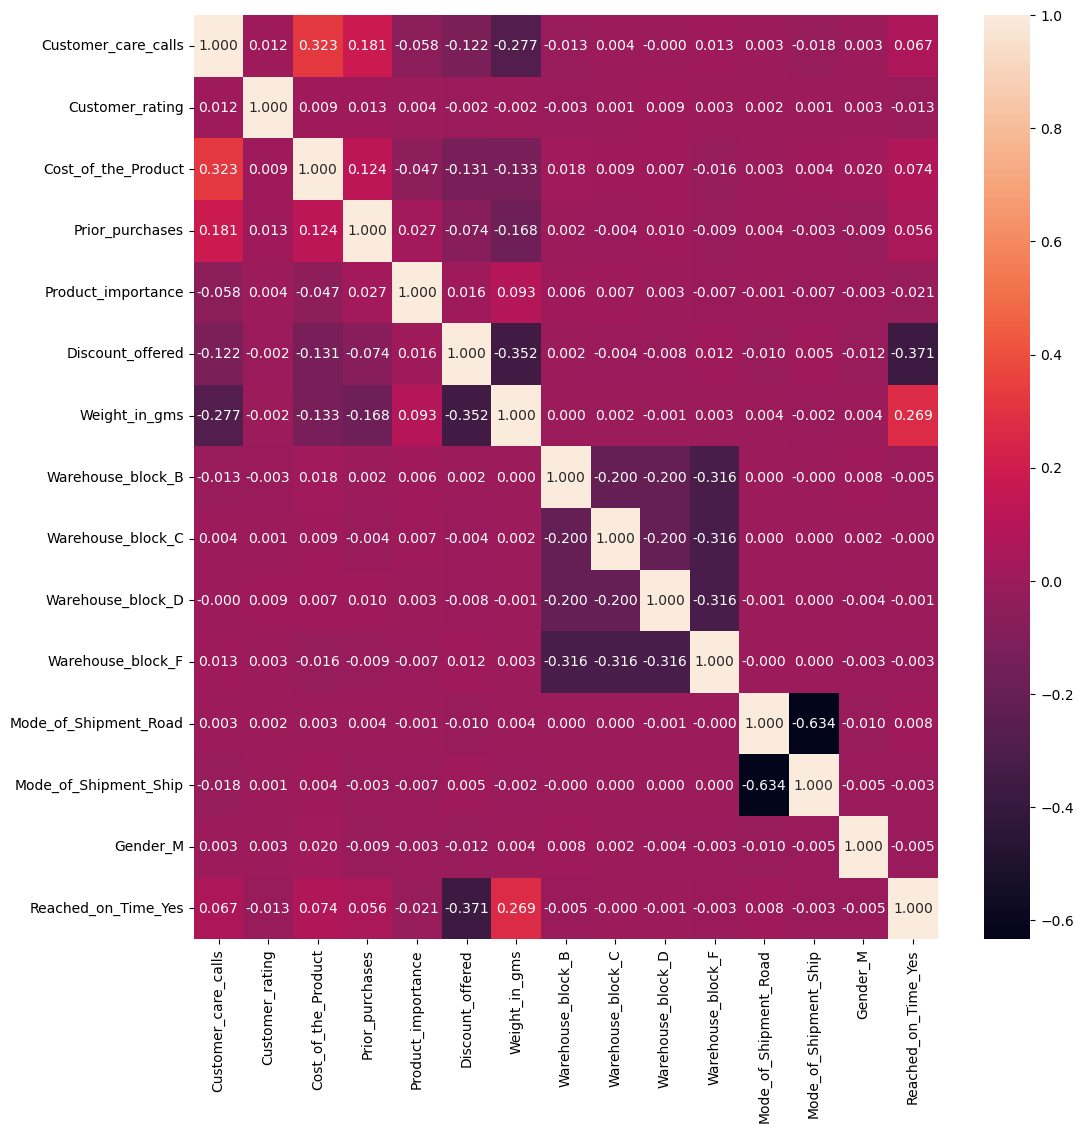

In [94]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.get_dummies(ecom, drop_first=True).corr(), annot=True, fmt='.3f')
plt.show()

In [95]:
# To find correlation coefficients between the target variable "Reached_on_Time_Yes"

pd.get_dummies(ecom, drop_first=False).corr()['Reached_on_Time_Yes'].sort_values(ascending=False)

Reached_on_Time_Yes        1.000000
Weight_in_gms              0.268793
Cost_of_the_Product        0.073587
Customer_care_calls        0.067126
Prior_purchases            0.055515
Warehouse_block_A          0.009317
Mode_of_Shipment_Road      0.007671
Gender_F                   0.004689
Warehouse_block_C         -0.000132
Warehouse_block_D         -0.000830
Warehouse_block_F         -0.002568
Mode_of_Shipment_Ship     -0.002577
Mode_of_Shipment_Flight   -0.004371
Gender_M                  -0.004689
Warehouse_block_B         -0.005106
Customer_rating           -0.013119
Product_importance        -0.020517
Discount_offered          -0.370837
Reached_on_Time_No        -1.000000
Name: Reached_on_Time_Yes, dtype: float64

Weight, and Cost are positively, amount of Discount is negatively correlated with the target variable.
Overall, there doesn't seem to be the problem of multicollinearity.

# One-Hot-Encoding

One Hot Encoding, also known as dummy variable encoding, is a popular technique used in data preprocessing to convert categorical variables into a binary vector representation. It is particularly useful when dealing with categorical features or variables that have no ordinal relationship.

In [96]:
# Convert categorical variables into binary (dummy) variables and remove the first categorical columns

ecom = pd.get_dummies(ecom, drop_first=True)
ecom.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M,Reached_on_Time_Yes
0,4,2,177,3,0,3.465736,1233,0,0,1,0,0,0,0,0
1,4,5,216,2,0,3.465736,3088,0,0,0,1,0,0,1,0
2,2,2,183,4,0,3.465736,3374,0,0,0,0,0,0,1,0
3,3,3,176,4,1,2.302585,1177,1,0,0,0,0,0,1,0
4,2,2,184,3,1,3.465736,2484,0,1,0,0,0,0,0,0


In [97]:
# used to split the DataFrame ecom into two parts: the input features (X) and the target variable (y). 
# Splitting data into X (input features) and y (target variable)

X = ecom.drop('Reached_on_Time_Yes', axis=1) # Specify the column name of the target variable to be dropped
y = ecom['Reached_on_Time_Yes']

# Scaling

The primary goal of scaling is to bring all features to a common scale, making them comparable and avoiding bias or dominance of certain features based on their magnitude. Scaling is particularly important when dealing with numerical features that have different units of measurement, scales, or ranges.

In [98]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [99]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Scale the numerical features
numerical_columns = X_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform feature selection using L1 regularization (Lasso)
lasso = Lasso(alpha=0.0000001)  # Adjust the alpha value for regularization strength
lasso.fit(X_train, y_train)

# Get the important features
important_features = X_encoded.columns[lasso.coef_ > 0]

# Print the important features
print("Important Features:")
print(important_features)

Important Features:
Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Weight_in_gms', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship'],
      dtype='object')


In [100]:
lasso.coef_

array([ 0.03386637, -0.00668979,  0.01943117,  0.02792252, -0.01295843,
       -0.13650835,  0.09964666, -0.02227935, -0.02295607, -0.01556626,
       -0.01593565,  0.01084778,  0.00598194, -0.00659609])

In [101]:
# To perform feature selection using normalization:
# Import the necessary libraries:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

#Split your dataset into features (X) and the target variable (y) that you want to predict:

X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
y = ecom['Reached_on_Time_Yes']  # Target variable

# Normalize the features using MinMaxScaler:

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply feature selection using SelectKBest and f_classif:

k = 6  # Number of features to select
selector = SelectKBest(f_classif, k=k)
X_selected = selector.fit_transform(X_normalized, y)

# Get the selected feature indices and column names:

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# get output:
print(selected_indices)
print(selected_features)


[0 2 3 4 5 6]
Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [102]:
# To perform feature selection using standardization:
# Import the necessary libraries:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

#Split your dataset into features (X) and the target variable (y) that you want to predict:

X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
y = ecom['Reached_on_Time_Yes']  # Target variable

# Standardize the features using StandardScaler:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply feature selection using SelectKBest and f_classif:

k = 6  # Number of features to select
selector = SelectKBest(f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get the selected feature indices and column names:

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# get output:
print(selected_indices)
print(selected_features)

[0 2 3 4 5 6]
Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [103]:
# Droping the columns

ecom = ecom.drop(['Customer_rating','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Gender_M'],axis = 1, inplace = True)
ecom

# Building Machine Learning Models

* Logistic Regression
* KNN
* Decision Trees
* Random Forest
* Gradient Boosting
* Extra Trees
* Support Vector Machines

In [104]:
# Importing all libraries:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")
import time

In [105]:
# First calculate the Logistic Regression to see the accuracy, precision, recall and F1 scores:

# Import the necessary libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split your dataset into features (X) and the target variable (y) that you want to predict:

#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print("Accuracy: ", accuracy*100)
print("Precision:", precision*100)
print("Recall:   ", recall*100)
print("F1 Score: ", f1*100)

Accuracy:  63.31818181818182
Precision: 55.898123324396785
Recall:    46.59217877094972
F1 Score:  50.822669104204756


In [106]:
# First calculate the KNN to see the accuracy, precision, recall and F1 scores:

# Import the necessary libraries:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split your dataset into features (X) and the target variable (y) that you want to predict:

#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of Logistic Regression model
model = KNeighborsClassifier(n_neighbors=5)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print("Accuracy: ", accuracy*100)
print("Precision:", precision*100)
print("Recall:   ", recall*100)
print("F1 Score: ", f1*100)

Accuracy:  64.31818181818181
Precision: 55.93952483801296
Recall:    57.877094972067034
F1 Score:  56.891817682591984


In [107]:
# First calculate the Decision Trees to see the accuracy, precision, recall and F1 scores:

# Import the necessary libraries:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split your dataset into features (X) and the target variable (y) that you want to predict:

#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating an instance of DTC model
model = DecisionTreeClassifier()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print("Accuracy: ", accuracy*100)
print("Precision:", precision*100)
print("Recall:   ", recall*100)
print("F1 Score: ", f1*100)

Accuracy:  65.36363636363637
Precision: 56.47509578544061
Recall:    56.17378048780488
F1 Score:  56.324035154757354


In [108]:
# First calculate the Random Forest to see the accuracy, precision, recall and F1 scores:

# Import the necessary libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split your dataset into features (X) and the target variable (y) that you want to predict:

#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating an instance of Random forest model
model = RandomForestClassifier()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print("Accuracy: ", accuracy*100)
print("Precision:", precision*100)
print("Recall:   ", recall*100)
print("F1 Score: ", f1*100)

Accuracy:  65.66666666666666
Precision: 55.800388852884
Recall:    65.625
F1 Score:  60.315236427320485


In [111]:
# 
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

#
def model_comparison(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(), X_train, y_train, X_test, y_test)
    knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
    dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
    rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)
    gbc_train_score, gbc_test_score, gbc_pr, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
    
    models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest',
              'Gradient Boosting']
    
    train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, gbc_train_score]
    test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, gbc_test_score]
    precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, gbc_pr,]
    recall = [lr_re, knn_re, dtc_re, rfc_re, gbc_re,]
    f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, gbc_f1,]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model', 1:'Training Score', 2: 'Test Score (Accuracy)', 3: 'Precision', 4: 'Recall', 5: 'F1 Score'}, axis=1)
    
    return model_comparison
    
print("Default DataFrame:")
display(model_comparison(X, y))
print('-'*40)
print("\nNormalized DataFrame:")
display(model_comparison(X_normalized, y))
print('-'*40)
print("\nStandardized DataFrame:")
display(model_comparison(X_scaled, y))

Default DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.632515,0.633058,0.544255,0.484786,0.512802
1,K-Nearest Neighbors,0.783553,0.644628,0.550388,0.589212,0.569138
2,Decision Tree,1.0,0.646832,0.556944,0.554633,0.555787
3,Random Forest,1.0,0.657576,0.559741,0.657676,0.604769
4,Gradient Boosting,0.721129,0.686226,0.569426,0.870678,0.688543


----------------------------------------

Normalized DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.632515,0.631405,0.542722,0.474412,0.506273
1,K-Nearest Neighbors,0.766318,0.634986,0.538122,0.590595,0.563139
2,Decision Tree,1.0,0.648485,0.559358,0.553942,0.556637
3,Random Forest,1.0,0.659504,0.560414,0.673582,0.611809
4,Gradient Boosting,0.721129,0.686226,0.569426,0.870678,0.688543


----------------------------------------

Standardized DataFrame:


,Model,Training Score,Test Score (Accuracy),Precision,Recall,F1 Score
0,Logistic Regression,0.633465,0.632782,0.544523,0.47787,0.509024
1,K-Nearest Neighbors,0.763876,0.635537,0.538801,0.590595,0.56351
2,Decision Tree,1.0,0.657025,0.569647,0.568465,0.569055
3,Random Forest,1.0,0.668044,0.569693,0.681189,0.620472
4,Gradient Boosting,0.721129,0.685675,0.568973,0.869986,0.687996


As expected, normalizing or standardization the data did not improve the performance of classification models significantly. I will proceed with the unscaled data.

#  Hyperparameter Tuning

Logistic Regression

In [45]:
start = time.time()

# Split your dataset into features (X) and the target variable (y) that you want to predict:
#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Create an instance of logistic regression
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of logistic regression with the best hyperparameters
best_model = LogisticRegression(**best_params)

# Fit the best model to the data
best_model.fit(X, y)

# Make predictions on new data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the best hyperparameters and accuracy score
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Hyperparameters :", best_params)
print("Accuracy:", accuracy*100)

GridSearchCV Runtime: 0.16 minutes
Best Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 63.86363636363637


# K-Nearest Neighbors

In [46]:
start = time.time()

# Split your dataset into features (X) and the target variable (y) that you want to predict:
#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Create an instance of KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of KNN with the best hyperparameters
best_model = KNeighborsClassifier(**best_params)

# Fit the best model to the data
best_model.fit(X, y)

# Make predictions on new data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the best hyperparameters and accuracy score
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy*100)

GridSearchCV Runtime: 0.05 minutes
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3}
Accuracy: 82.95454545454545


#  Decision Tree

In [47]:
start = time.time()

# Split your dataset into features (X) and the target variable (y) that you want to predict:
#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Create an instance of Decision Tree classifier
tree = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of Decision Tree classifier with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)

# Fit the best model to the data
best_model.fit(X, y)

# Make predictions on new data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the best hyperparameters and accuracy score
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy*100)

GridSearchCV Runtime: 0.05 minutes
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 100.0


# Random Forest

In [50]:
start = time.time()

# Split your dataset into features (X) and the target variable (y) that you want to predict:
#X = ecom.drop('Reached_on_Time_Yes', axis=1)  # Features
#y = ecom['Reached_on_Time_Yes']  # Target variable

# Create an instance of Random Forest classifier
forest = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params)

# Fit the best model to the data
best_model.fit(X, y)

# Make predictions on new data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the best hyperparameters and accuracy score
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy*100)



train_score = best_model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = best_model.evaluate(X_test, y_test, verbose = 0)[1]

print("Training Score: {:.3f}".format(train_score))
print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

GridSearchCV Runtime: 3.34 minutes
Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Accuracy: 100.0


AttributeError: 'RandomForestClassifier' object has no attribute 'evaluate'

# AdaBoost

In [66]:
start = time.time()

# Create an instance of AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of AdaBoost classifier with the best hyperparameters
best_model = AdaBoostClassifier(**best_params)

# Fit the best model to the data
best_model.fit(X, y)

# Make predictions on new data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the best hyperparameters and accuracy score
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy*100)

#train_score = best_model.evaluate(X_train, y_train, verbose = 0)[1]
#test_score = best_model.evaluate(X_test, y_test, verbose = 0)[1]

print("Training Score: {:.3f}".format(train_score))
print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

GridSearchCV Runtime: 1.45 minutes
Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 200}
Accuracy: 74.72727272727273
Training Score: 0.605
Test Score (Accuracy): 0.606
Precision: 0.641
Recall: 0.863
F1 Score: 0.735


# Gradient Boosting

In [80]:
start = time.time()

# Create an instance of Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [25, 50, 100],
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [1, 3, 5]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of Gradient Boosting classifier with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params)

# Fit the best model to the data
best_model.fit(X, y)

# Make predictions on new data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the best hyperparameters and accuracy score
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy*100)

train_score = model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = model.evaluate(X_test, y_test, verbose = 0)[1]

#print("Training Score: {:.3f}".format(train_score))
#print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

GridSearchCV Runtime: 0.65 minutes
Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 82.22727272727272
Precision: 0.736
Recall: 0.877
F1 Score: 0.801


# Classification

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

print("Shape of train set (X) :", X_train.shape)
print("Shape of train set (y) :", y_train.shape)
print("Shape of test set  (X) :", X_test.shape)
print("Shape of test set  (y) :", y_test.shape)

input_shape = X_train.shape[1]

Shape of train set (X) : (7369, 14)
Shape of train set (y) : (7369,)
Shape of test set  (X) : (3630, 14)
Shape of test set  (y) : (3630,)


In [70]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (input_shape,), name = "Hidden_Layer_1"))
model.add(Dense(8, activation='relu', name = "Hidden_Layer_2"))
model.add(Dense(4, activation='relu', name = "Hidden_Layer_3"))
model.add(Dense(2, activation='relu', name = "Hidden_Layer_4"))
model.add(Dense(1, activation='sigmoid', name = "Output"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                240       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 136       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 4)                 36        
                                                                 
 Hidden_Layer_4 (Dense)      (None, 2)                 10        
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer ='adam',
              loss='binary_crossentropy', 
              metrics =['accuracy'])

model.fit(X_train, y_train, epochs=300)

Epoch 1/300
231/231 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.7047
Epoch 2/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7076
Epoch 3/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7050
Epoch 4/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7057
Epoch 5/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7039
Epoch 6/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7069
Epoch 7/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7019
Epoch 8/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7027
Epoch 9/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7034
Epoch 10/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4761 - accura

231/231 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7196
Epoch 161/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7206
Epoch 162/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7198
Epoch 163/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7192
Epoch 164/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7229
Epoch 165/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7237
Epoch 166/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7199
Epoch 167/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7207
Epoch 168/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7222
Epoch 169/300
231/231 [==============================] - 0s 2ms/step - loss: 0.4606 - a

In [73]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

114/114 [==============================] - 0s 1ms/step


In [74]:
confusion_matrix(y_test, y_pred)

array([[1502,  682],
       [ 577,  869]], dtype=int64)

In [79]:
train_score = model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = model.evaluate(X_test, y_test, verbose = 0)[1]

print("Training Score: {:.3f}".format(train_score))
print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

Training Score: 0.601
Test Score (Accuracy): 0.600
Precision: 0.736
Recall: 0.877
F1 Score: 0.801


In [78]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(ecom.Reached_on_Time_Yes, ecom.Reached_on_Time_Yes, test_size=0.2, random_state=42)

# Create a random forest classifier object
rf_clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Calculate the mean accuracy on the training data and labels
train_score = rf_clf.score(X_train, y_train)

# Calculate the mean accuracy on the test data and labels
test_score = rf_clf.score(X_test, y_test)

#print(f"Train score: {train_score:.3f}")
#print(f"Test score: {test_score:.3f}")

train_score = model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = model.evaluate(X_test, y_test, verbose = 0)[1]

#print("Training Score: {:.3f}".format(train_score))
#print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

Precision: 0.736
Recall: 0.877
F1 Score: 0.801


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Add dropout regularization
model.add(Dense(31, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
#print('Test accuracy:', test_acc)

train_score = model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = model.evaluate(X_test, y_test, verbose = 0)[1]

#print("Training Score: {:.3f}".format(train_score))
#print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))

Epoch 1/200
275/275 [==============================] - 1s 3ms/step - loss: 49.7747 - accuracy: 0.5189 - val_loss: 13.2952 - val_accuracy: 0.4068
Epoch 2/200
275/275 [==============================] - 1s 2ms/step - loss: 12.0264 - accuracy: 0.5312 - val_loss: 6.8475 - val_accuracy: 0.5945
Epoch 3/200
275/275 [==============================] - 1s 2ms/step - loss: 5.2200 - accuracy: 0.5287 - val_loss: 2.2023 - val_accuracy: 0.5945
Epoch 4/200
275/275 [==============================] - 1s 2ms/step - loss: 2.5715 - accuracy: 0.5301 - val_loss: 0.7919 - val_accuracy: 0.6073
Epoch 5/200
275/275 [==============================] - 1s 2ms/step - loss: 1.5306 - accuracy: 0.5526 - val_loss: 0.7429 - val_accuracy: 0.5936
Epoch 6/200
275/275 [==============================] - 1s 3ms/step - loss: 1.0633 - accuracy: 0.5861 - val_loss: 0.6717 - val_accuracy: 0.5950
Epoch 7/200
275/275 [==============================] - 1s 2ms/step - loss: 0.9208 - accuracy: 0.5878 - val_loss: 0.8211 - val_accuracy: 0.5